# **Chapter 5: Support Vector Machines**

## **1. Pendahuluan**

Support Vector Machine (SVM) adalah salah satu model Machine Learning yang paling kuat dan serbaguna. Model ini mampu melakukan klasifikasi linear maupun non-linear, regresi, dan bahkan pendeteksian outlier.

**Mengapa SVM Penting?**
SVM sangat populer dan menjadi alat wajib bagi praktisi Machine Learning. Algoritma ini sangat cocok untuk klasifikasi dataset yang kompleks namun berukuran kecil hingga menengah.

Dalam bab ini, kita akan membahas:
* Konsep inti SVM (Large Margin Classification).
* Penanganan data non-linear (Kernel Trick).
* Penggunaan SVM untuk Regresi.
* Mekanisme matematika di balik layar.

## **2. Linear SVM Classification**

Ide dasar di balik SVM dapat dijelaskan dengan analogi jalan raya. Bayangkan kita memiliki dua kelas data yang dapat dipisahkan secara linear.

### **Large Margin Classification**
Banyak classifier linear (seperti garis putus-putus pada gambar di buku) mungkin memisahkan data dengan benar, namun posisinya terlalu dekat dengan sampel data, sehingga berisiko salah memprediksi data baru.

SVM bekerja berbeda. SVM mencoba membuat "jalan raya" selebar mungkin di antara kedua kelas. Ini disebut **Large Margin Classification**.
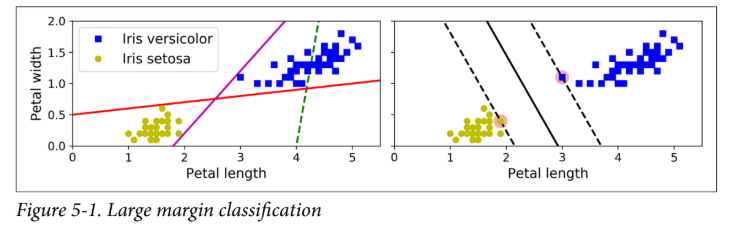
* Garis batas keputusan (*decision boundary*) berada tepat di tengah jalan raya tersebut.
* Menambahkan data baru di luar jalan raya tidak akan mengubah batas keputusan. Posisi jalan raya sepenuhnya ditentukan oleh sampel data yang terletak tepat di tepi jalan (disebut **Support Vectors**).

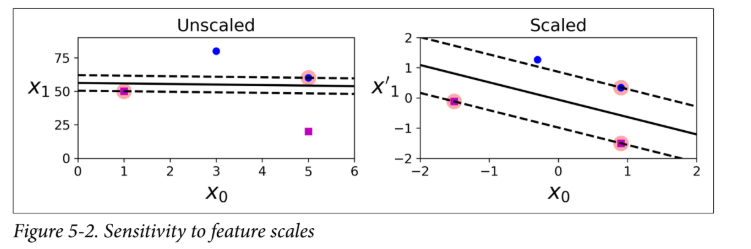
> **Catatan Penting:** SVM sangat sensitif terhadap skala fitur. Jika skala fitur tidak seimbang, jalan raya akan menjadi sangat sempit. Oleh karena itu, kita **wajib** melakukan penskalaan fitur (misalnya menggunakan `StandardScaler`) sebelum melatih SVM.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Memuat dataset Iris
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# Membuat Pipeline: Scaling lalu Linear SVM
# C=1, loss="hinge"
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])

svm_clf.fit(X, y)

# Melakukan prediksi
prediction = svm_clf.predict([[5.5, 1.7]])
print(f"Prediksi untuk [5.5, 1.7]: {prediction} (1.0 artinya Iris Virginica)")

Prediksi untuk [5.5, 1.7]: [1.] (1.0 artinya Iris Virginica)


### **Soft Margin Classification**

Jika kita memaksakan semua data harus berada di luar jalan raya (disebut *Hard Margin Classification*), ada dua masalah:
1.  Hanya bisa bekerja jika data terpisah secara linear sempurna
2.  Sangat sensitif terhadap outlier.

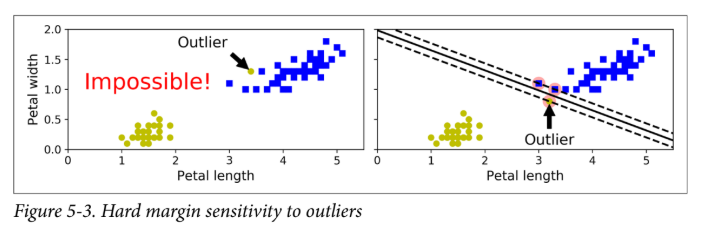

Untuk mengatasi ini, kita menggunakan **Soft Margin Classification**. Tujuannya adalah menyeimbangkan dua hal:
* Membuat jalan selebar mungkin.
* Membatasi pelanggaran margin (*margin violations*), yaitu data yang masuk ke tengah jalan atau sisi yang salah.

**Hyperparameter `C`:**
Dalam Scikit-Learn, kita mengontrol keseimbangan ini dengan hyperparameter `C`.
* **Nilai `C` Kecil:** Jalan lebih lebar, tetapi lebih banyak pelanggaran margin (lebih bias, variansi rendah).
* **Nilai `C` Besar:** Jalan lebih sempit, pelanggaran margin sedikit (lebih sedikit bias, variansi tinggi).

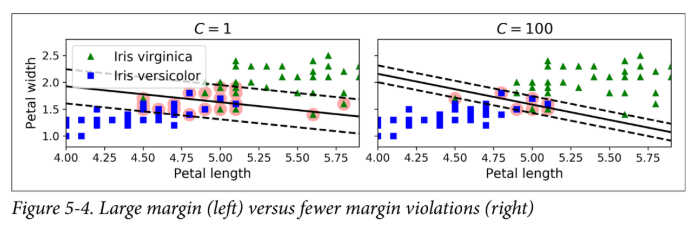

* Jika model SVM overfitting, cobalah mengurangi nilai `C` untuk melakukan regularisasi.


## **3. Nonlinear SVM Classification**

Banyak dataset di dunia nyata tidak dapat dipisahkan oleh garis lurus (linear). Salah satu cara menanganinya adalah dengan menambahkan fitur baru, seperti fitur polinomial.

Misalnya, dataset 1D yang tidak terpisah linear bisa menjadi terpisah linear jika kita menambahkan fitur $x_2 = (x_1)^2$

Mari kita coba pada dataset **Moons** (dua bentuk setengah lingkaran yang saling menjalin).

In [2]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# Membuat dataset Moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Pipeline: Fitur Polinomial -> Scaler -> Linear SVC
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X, y)
print("Model Nonlinear SVM berhasil dilatih pada dataset Moons.")

Model Nonlinear SVM berhasil dilatih pada dataset Moons.


c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


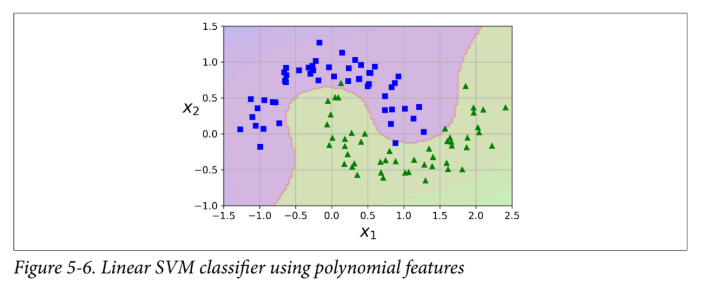

### **Polynomial Kernel**

Menambahkan fitur polinomial secara manual memiliki kelemahan: derajat rendah tidak cukup kompleks, derajat tinggi membuat fitur meledak jumlahnya dan lambat.

SVM memiliki solusi ajaib: **Kernel Trick**.
Teknik matematika ini memungkinkan kita mendapatkan hasil yang *sama* seolah-olah kita menambahkan banyak fitur polinomial, tanpa benar-benar menambahkannya. Ini mencegah ledakan kombinatorik fitur.

Hyperparameter penting untuk kernel Polinomial:
* `degree`: Derajat polinomial.
* `coef0`: Mengontrol seberapa besar model dipengaruhi oleh polinomial derajat tinggi vs rendah.

In [3]:
from sklearn.svm import SVC

# Menggunakan Kernel Trick (kernel="poly")
# Kita tidak perlu PolynomialFeatures di sini
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)
print("Model SVM dengan Kernel Polinomial berhasil dilatih.")

Model SVM dengan Kernel Polinomial berhasil dilatih.


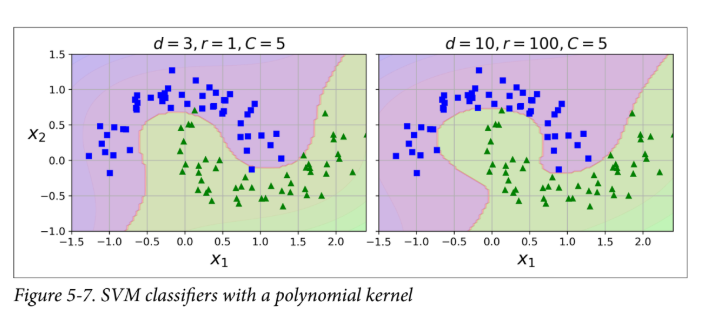

### **Gaussian RBF Kernel**

Teknik lain untuk menangani data nonlinear adalah menggunakan fitur similaritas, yang mengukur seberapa mirip sebuah instance dengan "landmark" tertentu. Salah satu yang paling umum adalah **Gaussian Radial Basis Function (RBF)**.

Sama seperti polinomial, kita bisa menggunakan Kernel Trick untuk RBF agar tidak perlu menghitung fitur tambahan secara eksplisit.

**Hyperparameter `gamma` ($\gamma$):**
Ini bertindak seperti regularisasi:
* **$\gamma$ Besar:** Kurva lonceng sempit. Batas keputusan menjadi tidak beraturan dan meliuk-liuk mengikuti data perorangan (risiko overfitting).
* **$\gamma$ Kecil:** Kurva lonceng lebar. Batas keputusan lebih halus (risiko underfitting).

Jika model overfitting, kurangi `gamma`. Jika underfitting, naikkan `gamma`.

In [4]:
# Menggunakan Gaussian RBF Kernel
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)
print("Model SVM dengan Kernel RBF berhasil dilatih.")

Model SVM dengan Kernel RBF berhasil dilatih.


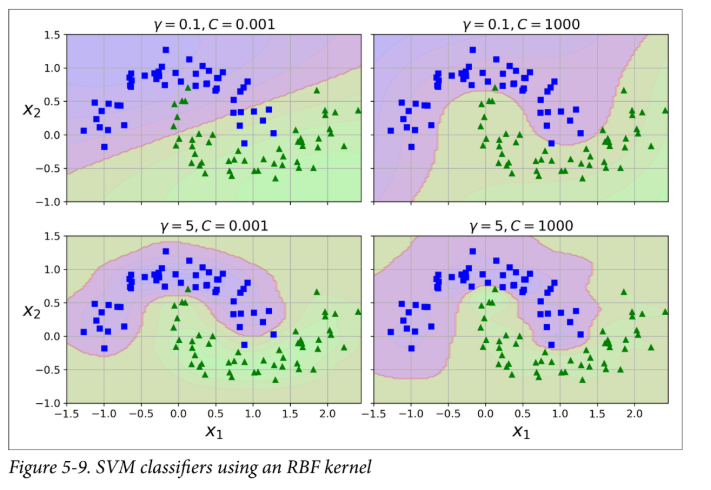

## **4. SVM Regression**

SVM juga bisa digunakan untuk regresi. Triknya adalah membalikkan tujuan klasifikasi:
* **Klasifikasi:** Mencoba memisahkan dua kelas dengan jalan selebar mungkin (memastikan data *di luar* jalan).
* **Regresi:** Mencoba memasukkan sebanyak mungkin data *ke dalam* jalan ("street") sambil membatasi pelanggaran margin (data di luar jalan).

Lebar jalan dikontrol oleh hyperparameter $\epsilon$ (epsilon).
* Data yang berada di dalam jalan tidak mempengaruhi prediksi (model disebut $\epsilon$-insensitive).
* Sama seperti klasifikasi, kita bisa menggunakan kernel untuk regresi non-linear.

In [6]:
from sklearn.svm import LinearSVR

# Generate data linear sederhana
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Linear SVM Regression
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

print(f"Prediksi Linear SVR untuk x=1.0: {svm_reg.predict([[1.0]])}")

# Nonlinear SVM Regression (Kernel Polinomial)
from sklearn.svm import SVR

# Generate data kuadratik
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)
print("Model SVR (Kernel Poly) berhasil dilatih.")

Prediksi Linear SVR untuk x=1.0: [6.52640746]
Model SVR (Kernel Poly) berhasil dilatih.


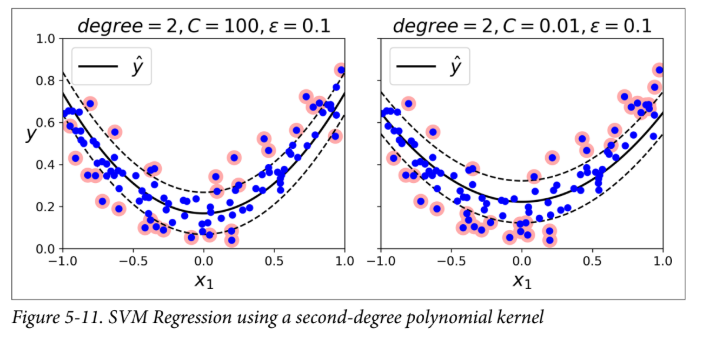

## **5. Di Balik Layar (Teori Singkat)**

Bagaimana SVM membuat keputusan?
Model SVM linear memprediksi kelas baru $x$ dengan menghitung fungsi keputusan:
$$h = w^T x + b$$
Jika hasilnya positif, prediksi kelas 1. Jika negatif, prediksi kelas 0.

**Tujuan Pelatihan:**
Kita ingin meminimalkan norma vektor bobot $||w||$. Semakin kecil $w$, semakin besar marginnya.
Fungsi biaya yang digunakan sering melibatkan **Hinge Loss** ($max(0, 1-t)$), yang bernilai 0 jika data berada di sisi jalan yang benar dan aman.

## **6. Kesimpulan**

Dalam bab ini, kita telah mempelajari:
1.  **Konsep Inti:** SVM berusaha menemukan margin terlebar (jalan raya) antara dua kelas. Support vector adalah elemen kunci yang menopang jalan tersebut.
2.  **Soft Margin:** Menggunakan hyperparameter `C` untuk menyeimbangkan lebar margin dan kesalahan klasifikasi.
3.  **Kernel Trick:** Memungkinkan SVM menangani data non-linear yang kompleks (seperti kernel Polynomial dan RBF) tanpa komputasi fitur yang berat.
4.  **SVM Regression:** Menggunakan prinsip yang sama tapi terbalik (memasukkan data ke dalam margin $\epsilon$).

SVM adalah alat yang sangat kuat untuk dataset ukuran kecil hingga menengah, namun bisa menjadi sangat lambat untuk dataset yang sangat besar (ratusan ribu data) karena kompleksitas komputasinya.